## Author: Arnab Datta

## Task2: Clustering to optimal number of clusters.

In [1]:
# library imports 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

%matplotlib inline

### Loading dataset 

In [2]:
# Load the iris dataset

ref_data = datasets.load_iris()
data = pd.DataFrame(ref_data.data, columns = ref_data.feature_names)
data.head() 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Applying K-Means algorithm

In [3]:
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 

In [4]:
# converting dataframe to numpy sparse array because K-means parameters takes array like argument. 
data_np=data.to_numpy()
data_np

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [5]:
## Applying K-means for 1-9 clusters.

distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(data_np) 
    kmeanModel.fit(data_np)     
    
    # Caluclating distortion per cluster size. Distortion is the average of the squared distances from the cluster centers of the respective clusters.
    distortions.append(sum(np.min(cdist(data_np, kmeanModel.cluster_centers_,'euclidean'),axis=1)) / data_np.shape[0]) 
    
     # Caluclating distortion per cluster size. Insertia is the sum of squared distances of samples to their closest cluster center.
    inertias.append(kmeanModel.inertia_) 
   

### Deciding on number of clusters based on error paramaters

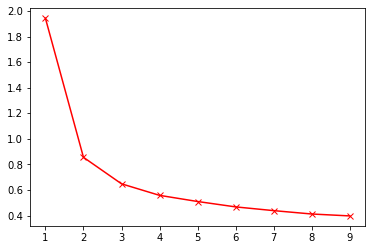

In [6]:
#plotting based on distortion vs number of clusters .

plt.plot(K,distortions, marker='x', color='red')

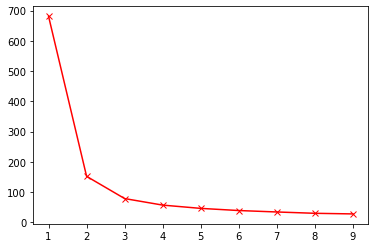

In [7]:
#plotting based on distortion vs number of clusters .

plt.plot(K,inertias, marker='x', color='red')

Based on the plotting, we can conclude 3 clusters to be the optimal number of clusters for the given dataset using the elbow method. Thus formulating the final clustering with number of cluster=3 and proceeding for visualization.

### Visual representation of the custering

In [8]:
#clustering the dataset

kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
clusters = kmeans.fit_predict(data_np)

In [9]:
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

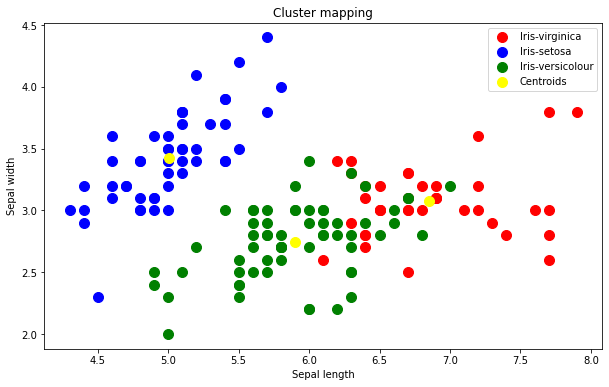

In [10]:
# Visualising the clusters - On the first two columns

plt.figure(figsize=(10,6))

plt.scatter(data_np[clusters == 0, 0], data_np[clusters == 0, 1], 
            s = 100, c = 'red', label = 'Iris-virginica')
plt.scatter(data_np[clusters == 1, 0], data_np[clusters == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(data_np[clusters == 2, 0], data_np[clusters == 2, 1],
            s = 100, c = 'green', label = 'Iris-versicolour')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.title('Cluster mapping')
plt.ylabel('Sepal width')
plt.xlabel('Sepal length')
plt.legend()

This visualisation clearly shows the clustering of the iris dataset.  